<a href="https://colab.research.google.com/github/yousefhassan1999/Edvora/blob/main/Computer_Vision_Asg_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

Downloading...
From: https://drive.google.com/uc?id=1AgPnjl6AqFO1Z5KRw6KhdjtrZgSb5VUe
To: /content/CV.png
100% 114k/114k [00:00<00:00, 67.9MB/s]


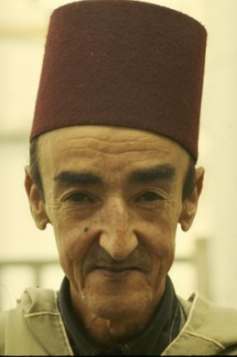

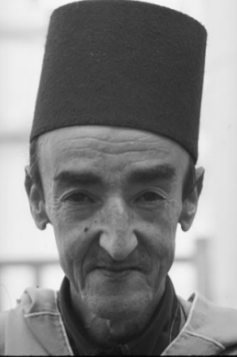

In [ ]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
from google.colab.patches import cv2_imshow
%matplotlib inline

!gdown 1AgPnjl6AqFO1Z5KRw6KhdjtrZgSb5VUe
source = 'CV.png'

image = cv2.imread(source) # reads the image

# The image will first be converted to grayscale
GrayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(image)
cv2_imshow(GrayImage)

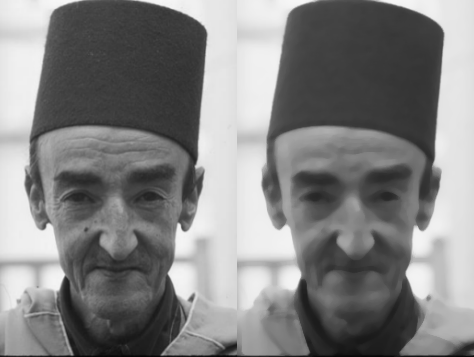

In [ ]:
figure_size = 7 # the dimension of the x and y axis of the kernal.
median_new_image = cv2.medianBlur(GrayImage, figure_size)
cv2_imshow(np.concatenate((GrayImage, median_new_image), axis=1))

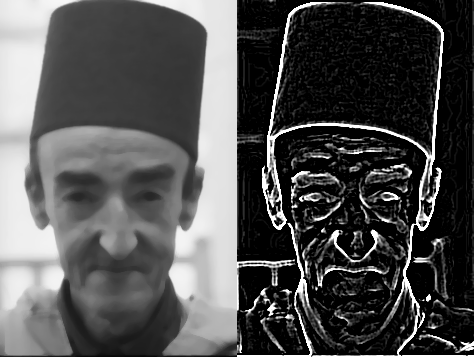

In [ ]:
laplacian_new_image = cv2.Laplacian(median_new_image,cv2.CV_16S,ksize=5)
cv2_imshow(np.concatenate((median_new_image,laplacian_new_image), axis=1))

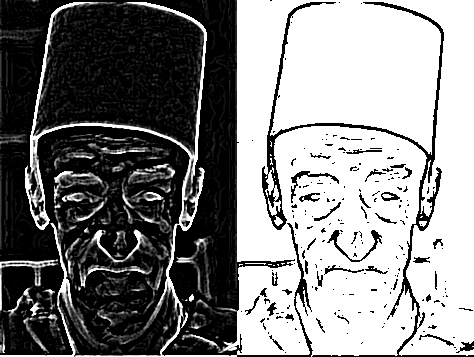

In [ ]:
ret, thresh2 = cv2.threshold(laplacian_new_image, thresh=125, maxval=255, type=cv2.THRESH_BINARY_INV)
cv2_imshow(np.concatenate((laplacian_new_image,thresh2), axis=1))

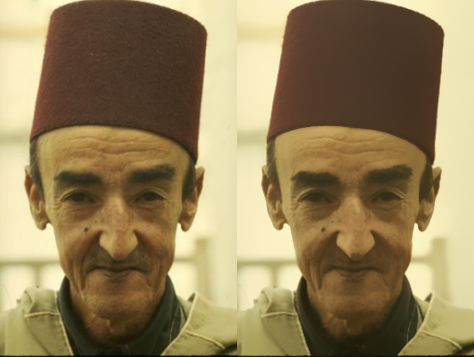

In [ ]:
blur = cv2.bilateralFilter(image, d=40, sigmaColor=30, sigmaSpace=200)
cv2_imshow(np.concatenate((image,blur), axis=1))

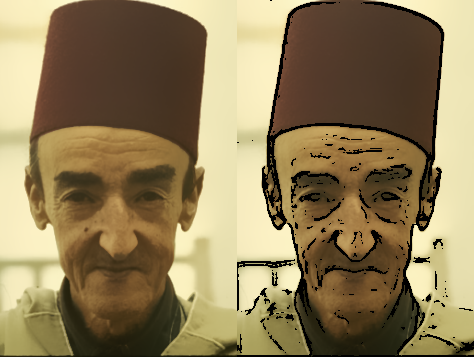

In [ ]:
cartoonImage = cv2.bitwise_and(blur, blur, mask=thresh2.astype(np.uint8))
cv2_imshow(np.concatenate((blur,cartoonImage), axis=1))

# Part 2

Downloading...
From: https://drive.google.com/uc?id=16KAsfRCvejx0zGXAoDR_sxdA68dFgUaj
To: /content/testHough.jpg
100% 776k/776k [00:00<00:00, 108MB/s]


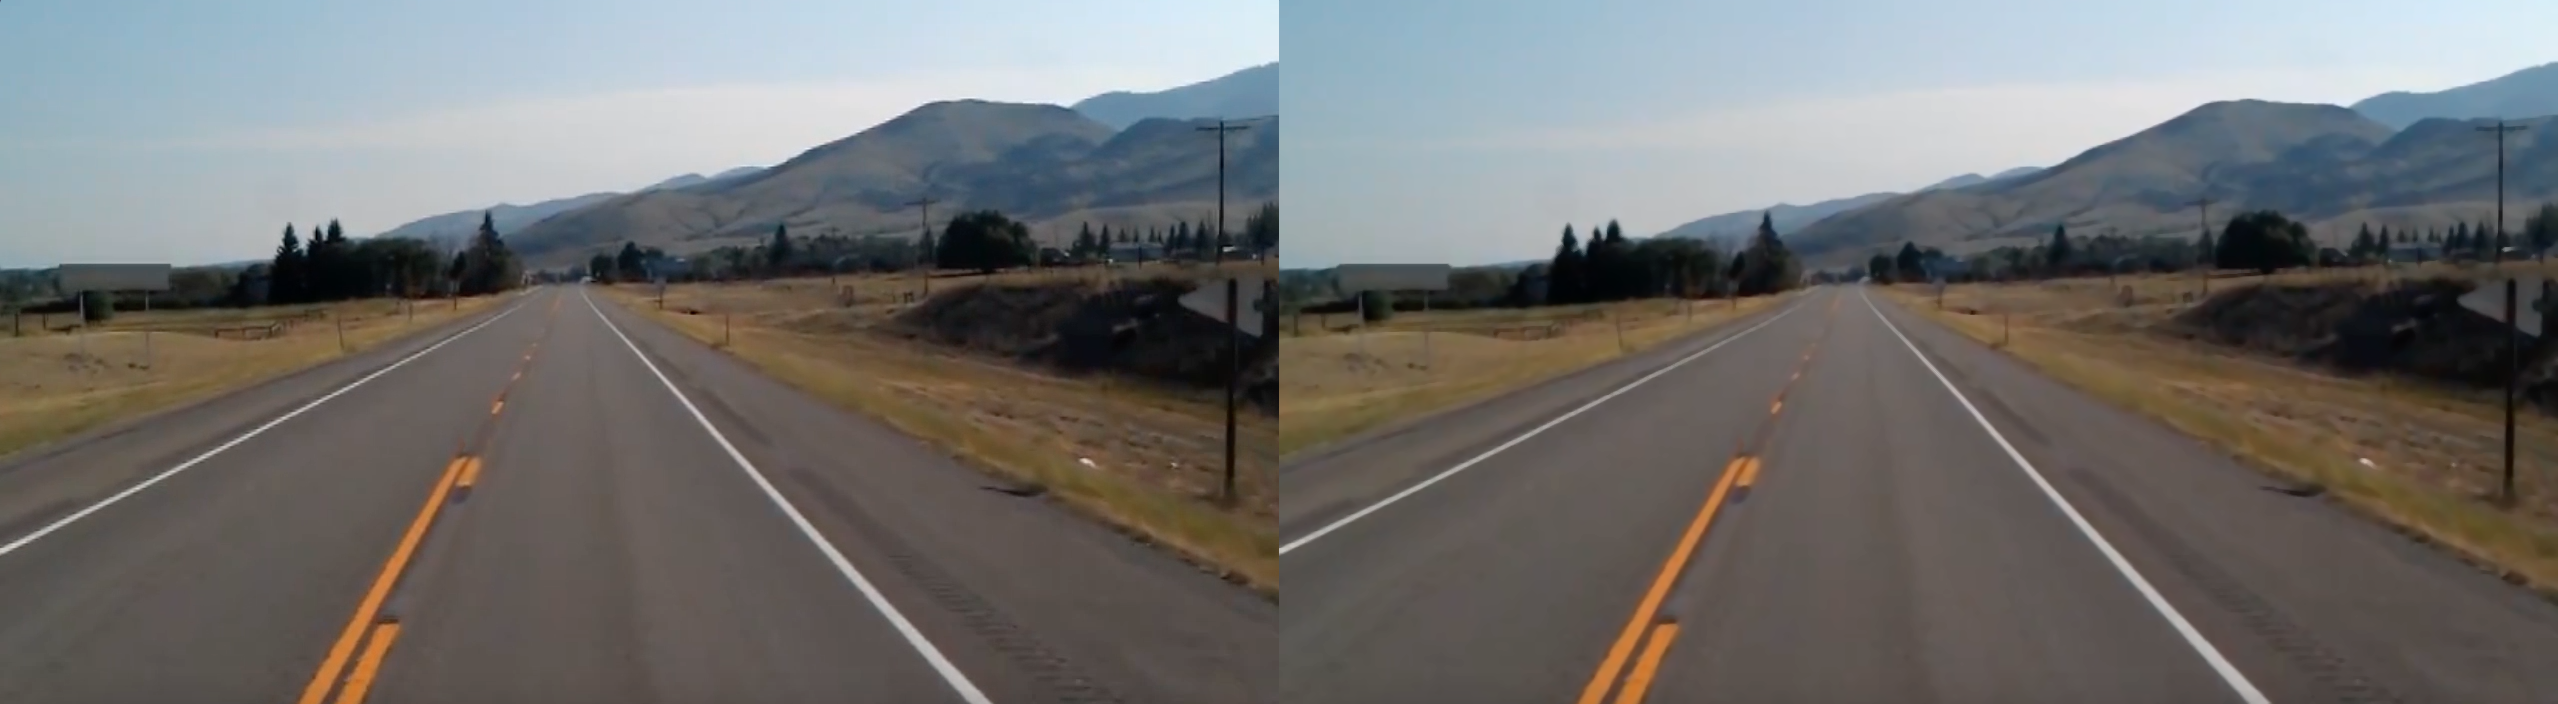

In [ ]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
from google.colab.patches import cv2_imshow
import gdown
%matplotlib inline

!gdown 16KAsfRCvejx0zGXAoDR_sxdA68dFgUaj
source = '/content/testHough.jpg'

original = cv2.imread(source)
smoothed = cv2.medianBlur(original, 5)

cv2_imshow(np.concatenate((original, smoothed), axis=1))

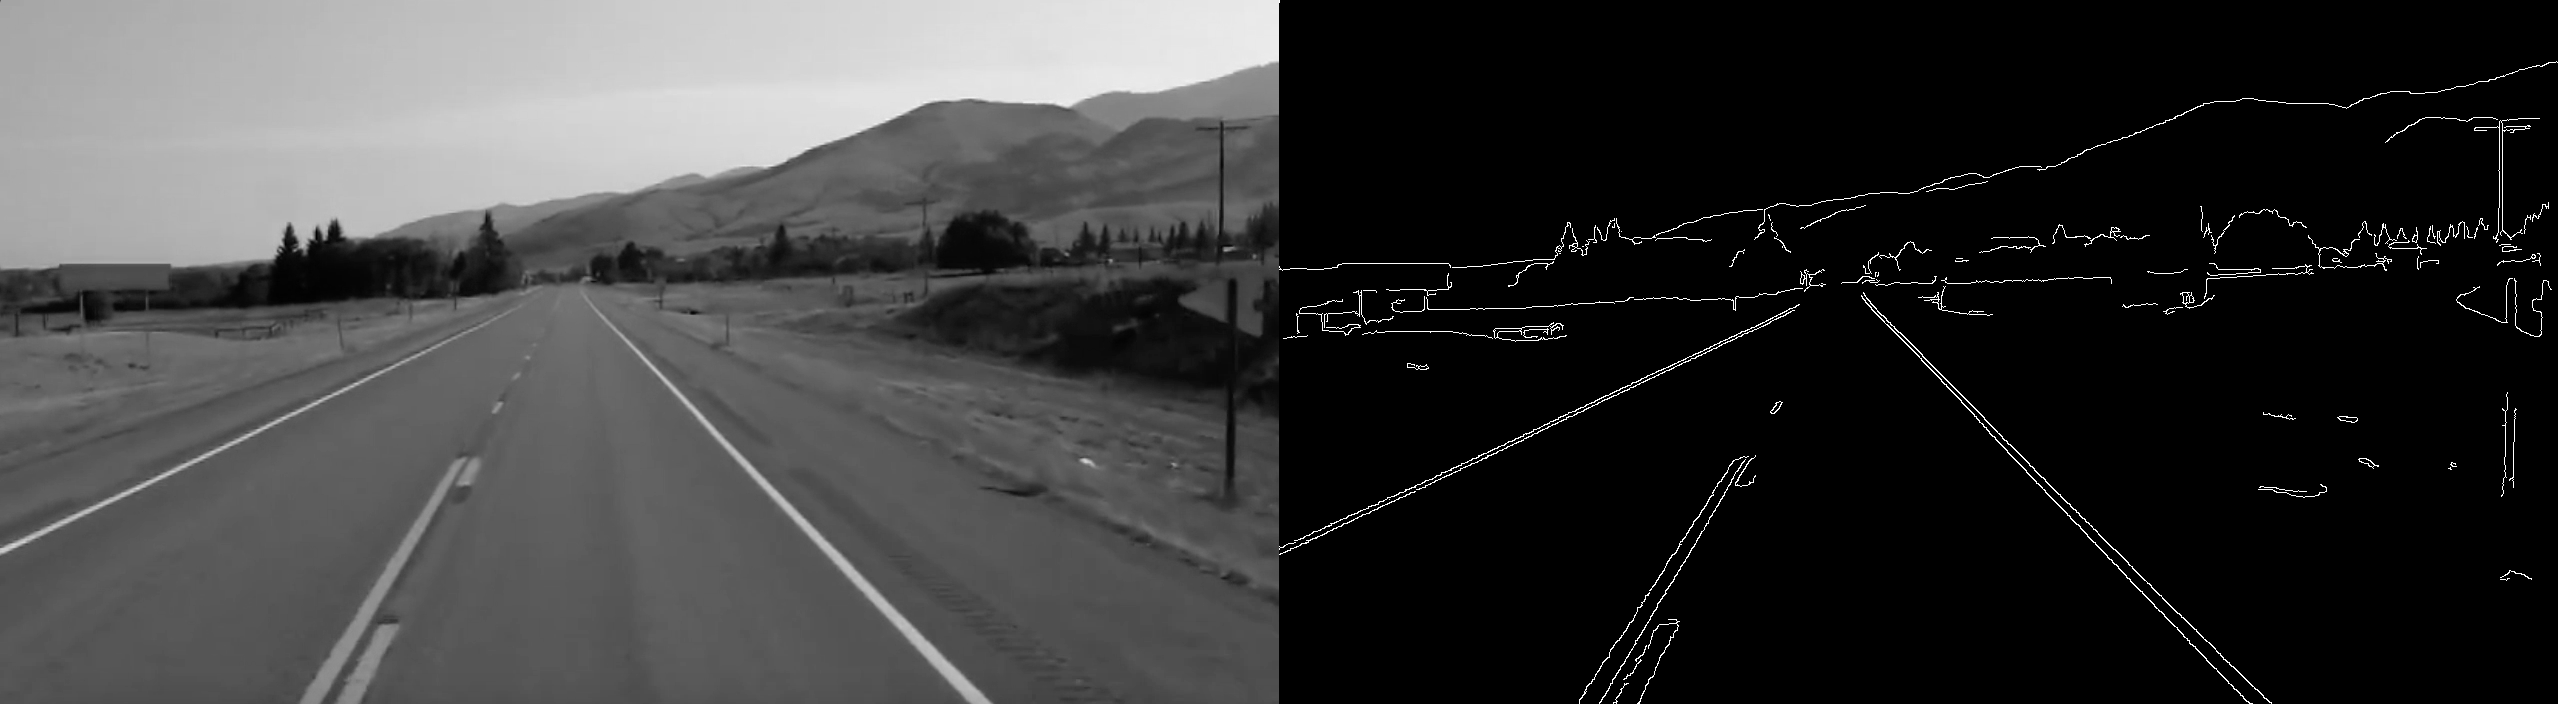

In [ ]:
GrayImage = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
edge = cv2.Canny(GrayImage, threshold1=50, threshold2=150, apertureSize=3)
cv2_imshow(np.concatenate((GrayImage, edge), axis=1))

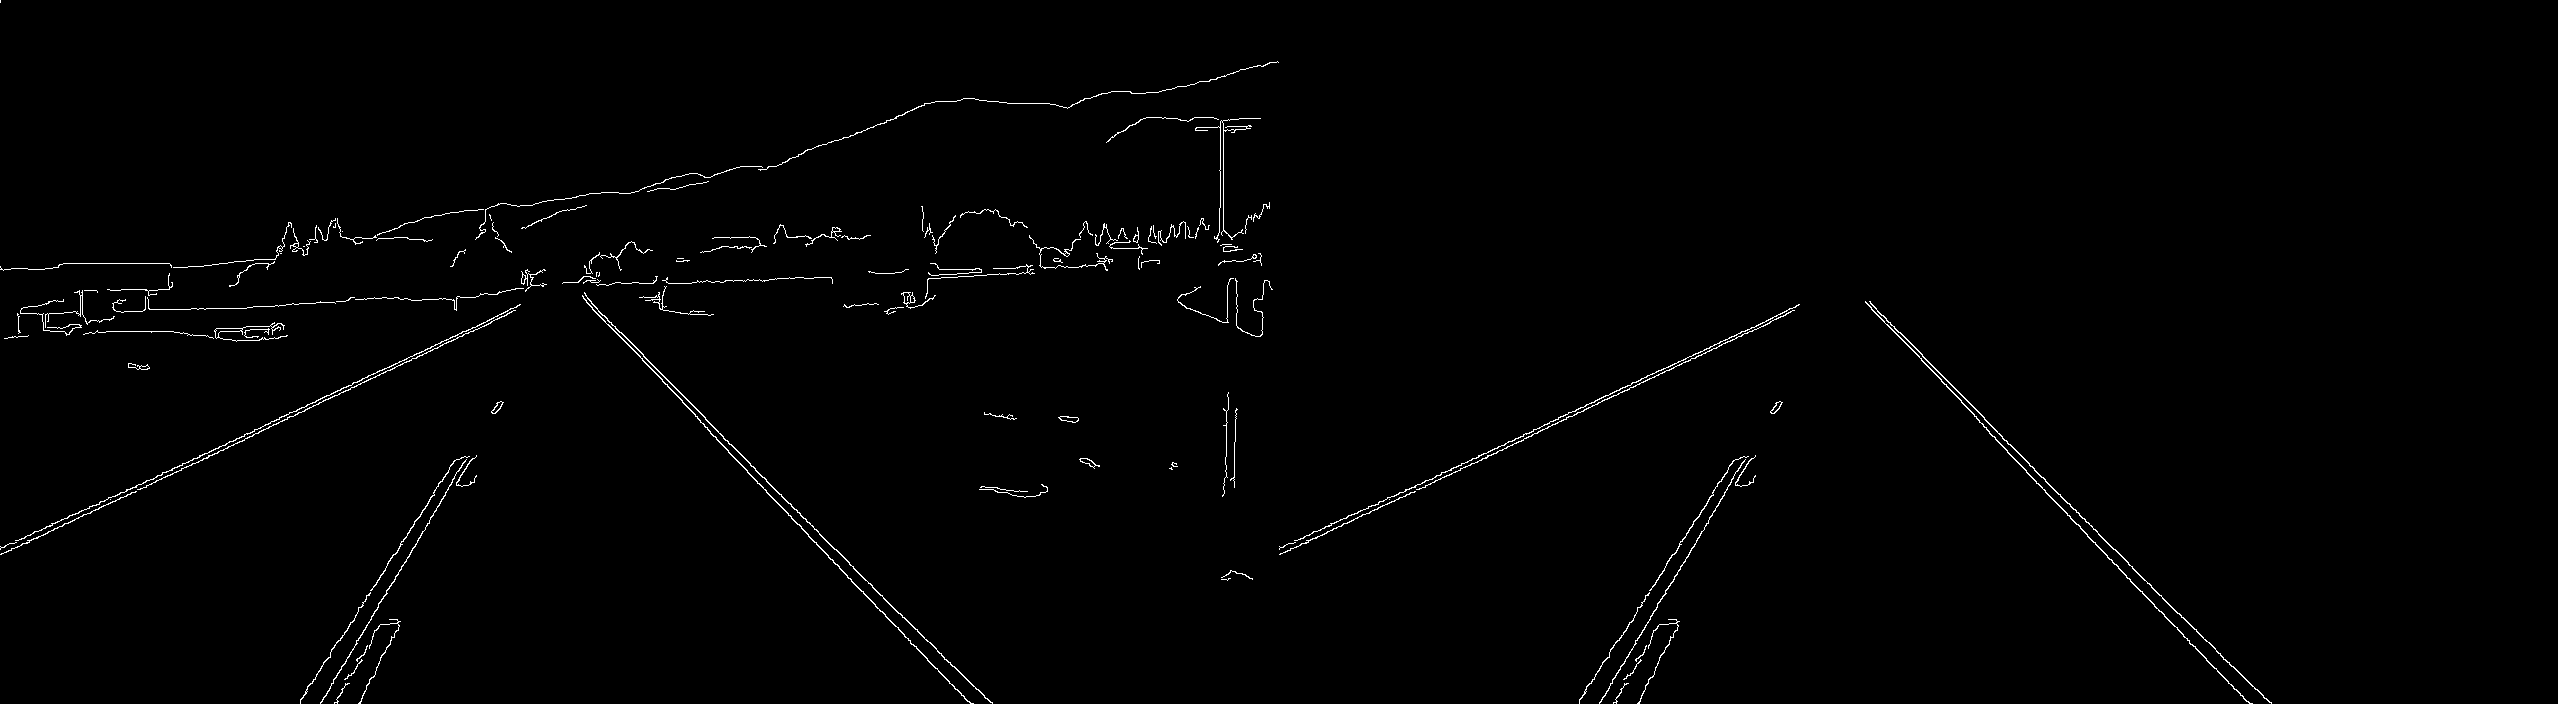

In [ ]:
mask_poly = np.array(
    [[[0,500],[500,300],[630,300],[1100,703],[1278,703],[1278,0],[0,0]]],
    dtype=np.int32)
ROI = edge.copy()
cv2.fillPoly(ROI, mask_poly, 0)
cv2_imshow(np.concatenate((edge, ROI), axis=1))

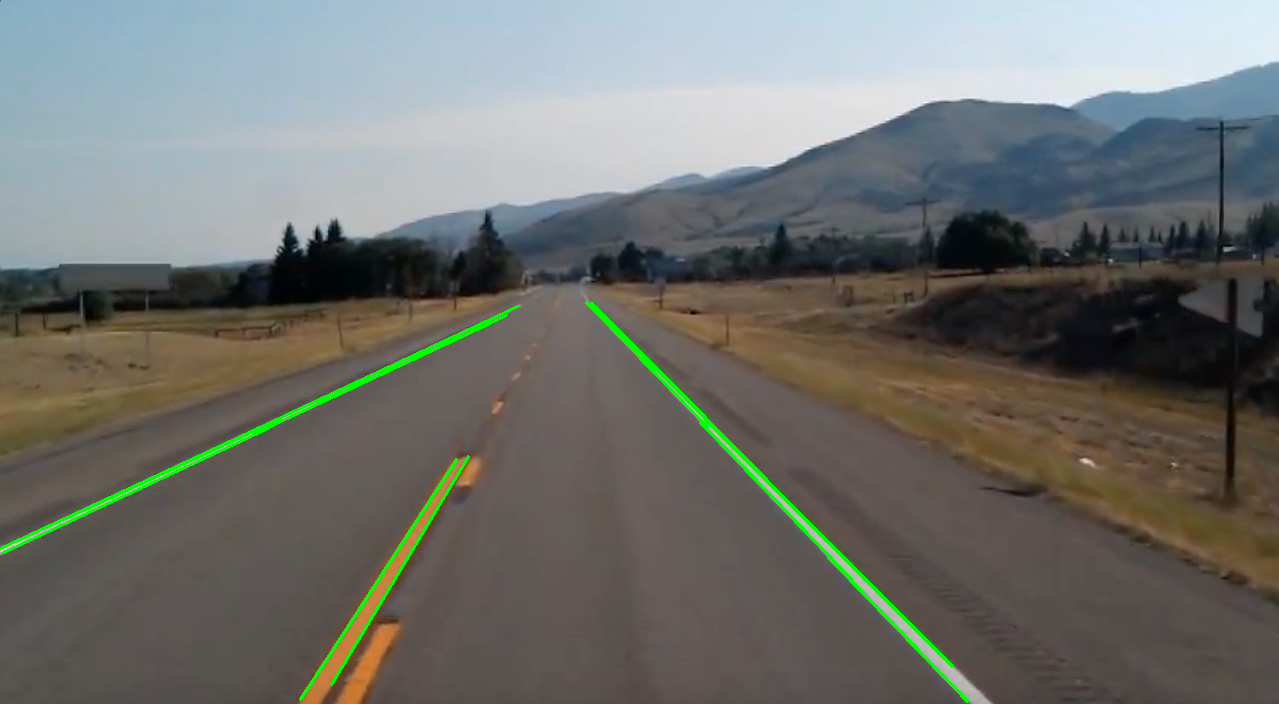

In [ ]:
import math
o=original.copy();
lines = cv2.HoughLinesP(
            ROI, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=100, # Min number of votes for valid line
            minLineLength=100, # Min allowed length of line
            maxLineGap=10 # Max allowed gap between line for joining them
            )
 
# Iterate over points
for points in lines:
    # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    # Draw the lines joing the points
    # On the original image
    cv2.line(o,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(o)